# Research on Parallelization of finding K Value Algorithms
The objective of this project is to compare different algorithms for finding optimal K Value, and compare their performances after parallelization and how much impact parallelization has on these algorithms.

## Importing Dependencies

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import random as rd

## The Iris Dataset


#### Loading Dataset

In [43]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Dataset Information

In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Dataset Outcomes

In [45]:
pd.crosstab(index=iris["species"], columns="count")

col_0,count
species,
setosa,50
versicolor,50
virginica,50


#### Data Visualization

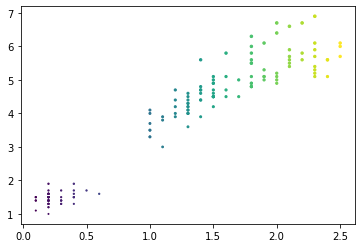

In [46]:
plt.scatter(iris.petal_width,iris.petal_length,iris.petal_length,iris.petal_width)

In [64]:
x = iris.iloc[:, [0, 1, 2, 3]].values #all parameters
y=iris["species"] #class labels

In [65]:
# Shape of Dataset
m=x.shape[0] #number of training examples
n=x.shape[1] #number of features
print("Training Examples: " + str(m) + " Features: "+ str(n))

Training Examples: 150 Features: 4


## The K Means Algorithm
A clustering algorithm is a process of dividing a physical or abstract object into a collection of similar objects. A cluster is a collection of data objects; objects in the same cluster are like each other and different from objects in other clusters
I K Means Clustering
1.  Specify number of clusters K.
2. Randomly select k data points. These data points are called centroids.
3. Measure the distance of first data point with all centroids.
4. Assign the data point to the nearest cluster.
5. Repeat 3 and 4 for all points.
6. Calculate Mean of each cluster.
7. Make these means new centroids.
8. We repeat the process until taking mean no longer effects our clusters.

In [66]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
classification = kmeans.fit_predict(x)

#### Visualizing Clusters

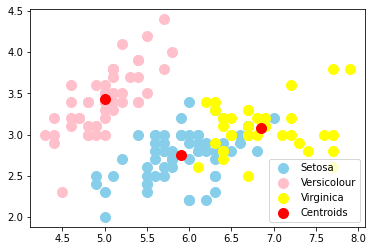

In [71]:
#Visualising the clusters
plt.scatter(x[classification == 0, 0], x[classification == 0, 1], s = 100, c = 'skyblue', label = 'Setosa')
plt.scatter(x[classification == 1, 0], x[classification == 1, 1], s = 100, c = 'pink', label = 'Versicolour')
plt.scatter(x[classification == 2, 0], x[classification == 2, 1], s = 100, c = 'yellow', label = 'Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


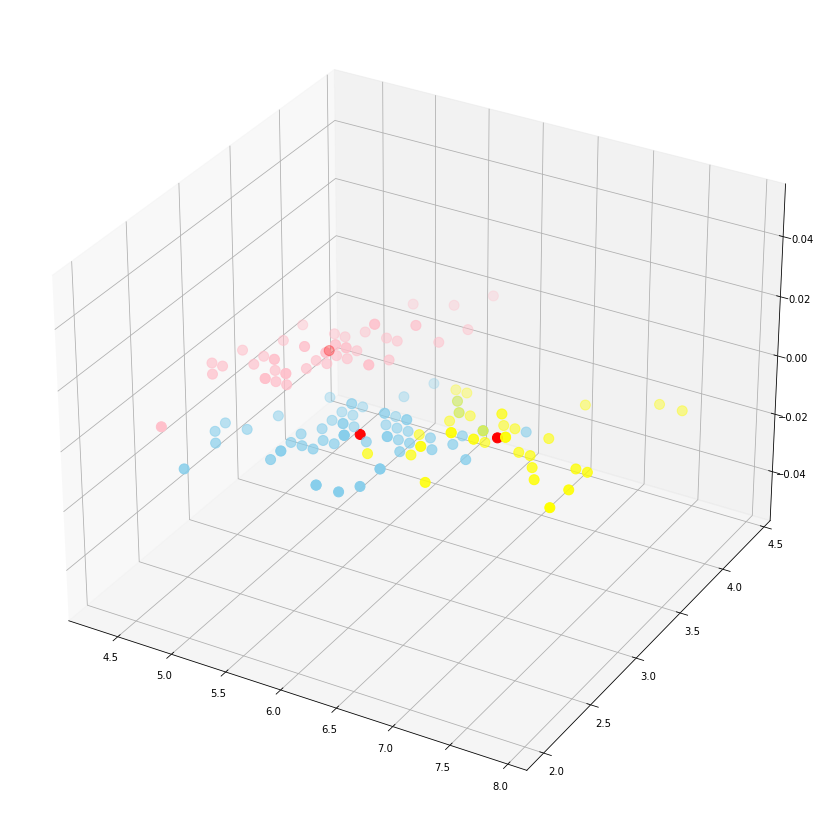

In [73]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[classification == 0, 0], x[classification == 0, 1], s = 100, c = 'skyblue', label = 'Setosa')
plt.scatter(x[classification == 1, 0], x[classification == 1, 1], s = 100, c = 'pink', label = 'Versicolour')
plt.scatter(x[classification == 2, 0], x[classification == 2, 1], s = 100, c = 'yellow', label = 'Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()